# Chapter 4

NMF - non-negative matrix factorization. NMF models are interpretable - which is a big benefit over PCA.

In [9]:
# data prep - compile the word frequency matrix
import pandas as pd
from scipy.sparse import csr_matrix

df = pd.read_csv('wikipedia-vectors.csv', index_col=0)
articles = csr_matrix(df.transpose())
titles = list(df.columns)

words = pd.read_csv('wikipedia-vocabulary-utf8.txt', header=None)
words = words.iloc[:,0].tolist()
words

['aaron',
 'abandon',
 'abandoned',
 'abandoning',
 'abandonment',
 'abbas',
 'abbey',
 'abbreviated',
 'abbreviation',
 'abc',
 'abdomen',
 'abdominal',
 'abdul',
 'abel',
 'abilities',
 'ability',
 'able',
 'abnormal',
 'abnormalities',
 'abnormally',
 'aboard',
 'abolish',
 'abolished',
 'abolishing',
 'abolition',
 'aboriginal',
 'abortion',
 'abraham',
 'abroad',
 'abrupt',
 'abruptly',
 'absence',
 'absent',
 'absolute',
 'absolutely',
 'absorb',
 'absorbed',
 'absorbing',
 'absorbs',
 'absorption',
 'abstract',
 'abstraction',
 'absurd',
 'abu',
 'abundance',
 'abundant',
 'abuse',
 'abused',
 'abuses',
 'abusive',
 'academia',
 'academic',
 'academics',
 'academies',
 'academy',
 'accelerate',
 'accelerated',
 'accelerating',
 'acceleration',
 'accent',
 'accents',
 'accept',
 'acceptable',
 'acceptance',
 'accepted',
 'accepting',
 'accepts',
 'access',
 'accessed',
 'accessible',
 'accessing',
 'accession',
 'accessories',
 'accessory',
 'accident',
 'accidental',
 'accidenta

In [2]:
articles.shape

(60, 13125)

In [3]:
# Import NMF
from sklearn.decomposition import NMF

# Create an NMF instance: model
# components is out best guess at the number of topics...
model = NMF(n_components=6)

# Fit the model to articles
model.fit(articles)

# Transform the articles: nmf_features
nmf_features = model.transform(articles)

# Print the NMF features
print(nmf_features)


[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 4.40465398e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 5.66604152e-01]
 [3.82046497e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 3.98646563e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 3.81739934e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 4.85516035e-01]
 [1.29287393e-02 1.37892477e-02 7.76356155e-03 3.34573266e-02
  0.00000000e+00 3.34521370e-01]
 [0.00000000e+00 0.00000000e+00 2.06749139e-02 0.00000000e+00
  6.04261265e-03 3.59061338e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 4.90975572e-01]
 [1.54270511e-02 1.42820740e-02 3.76646983e-03 2.37171763e-02
  2.62523554e-02 4.80774377e-01]
 [1.11735639e-02 3.13684640e-02 3.09497475e-02 6.57168414e-02
  1.96605984e-02 3.38288207e-01]
 [0.00000000e+00 0.00000000e+00 5.30739211e-01 0.0

In [4]:
# Import pandas
import pandas as pd

# Create a pandas DataFrame: df
df = pd.DataFrame(nmf_features, index=titles)

# Print the row for 'Anne Hathaway'
print(df.loc['Anne Hathaway'])

# Print the row for 'Denzel Washington'
print(df.loc['Denzel Washington'])


0    0.003845
1    0.000000
2    0.000000
3    0.575857
4    0.000000
5    0.000000
Name: Anne Hathaway, dtype: float64
0    0.000000
1    0.005601
2    0.000000
3    0.422487
4    0.000000
5    0.000000
Name: Denzel Washington, dtype: float64


Notice that for both actors, the NMF feature 3 has by far the highest value. This means that both articles are reconstructed using mainly the 3rd NMF component. In the next video, you'll see why: NMF components represent topics (for instance, acting!).

In [12]:
# Import pandas
import pandas as pd

# Create a DataFrame: components_df
components_df = pd.DataFrame(model.components_, columns=words)

# Print the shape of the DataFrame
print(components_df.shape)

# Select row 3: component (nitpick - this is 4th row)
component = components_df.iloc[3]

# Print result of nlargest
print(component.nlargest())


(6, 13125)
film       0.627717
award      0.253067
starred    0.245222
role       0.211397
actress    0.186350
Name: 3, dtype: float64


In [16]:
# data prep
from urllib.request import urlretrieve
import numpy as np
url = 'https://assets.datacamp.com/production/course_2072/datasets/'
file = 'lcd-digits.csv'
urlretrieve(url+file, file)

digits = pd.read_csv(file, header=None)
print(digits.shape)

samples = np.asarray(digits)

(100, 104)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


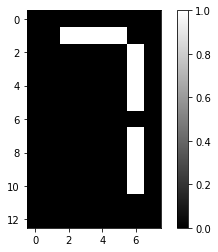

In [19]:
# Import pyplot
from matplotlib import pyplot as plt

# Select the 0th row: digit
digit = samples[0,:]

# Print digit
print(digit)

# Reshape digit to a 13x8 array: bitmap
bitmap = digit.reshape((13,8))

# Print bitmap
print(bitmap)

# Use plt.imshow to display bitmap
plt.imshow(bitmap, cmap='gray', interpolation='nearest')
plt.colorbar()
plt.show()

In [21]:
def show_as_image(sample):
    bitmap = sample.reshape((13, 8))
    plt.figure()
    plt.imshow(bitmap, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.show()

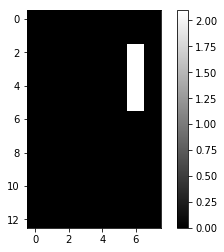

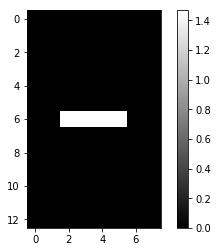

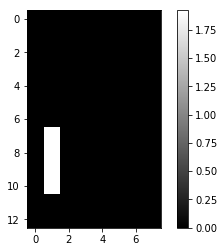

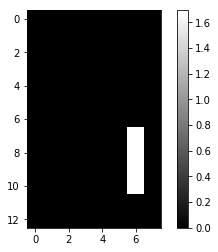

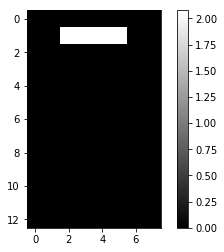

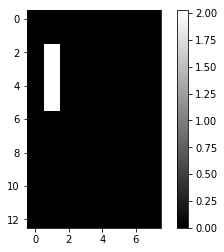

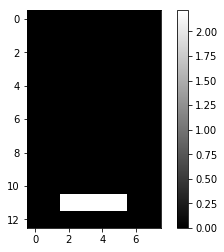

[4.76823559e-01 0.00000000e+00 0.00000000e+00 5.90605054e-01
 4.81559442e-01 0.00000000e+00 7.37557191e-16]


In [22]:
# Import NMF
from sklearn.decomposition import NMF

# Create an NMF model: model
# There are seven cells in the LCD display, 
# so that is how many topics we expect to find
model = NMF(n_components=7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)

# Assign the 0th row of features: digit_features
digit_features = features[0,:]

# Print digit_features
print(digit_features)

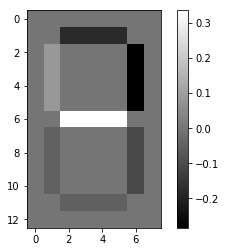

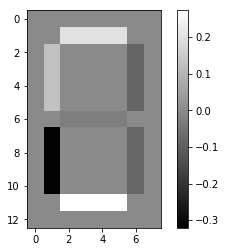

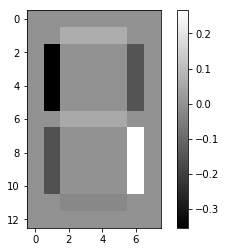

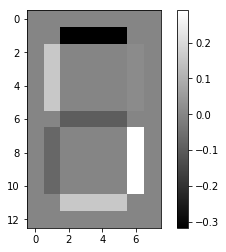

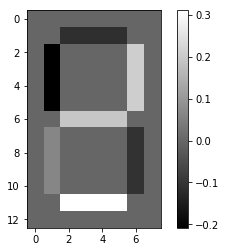

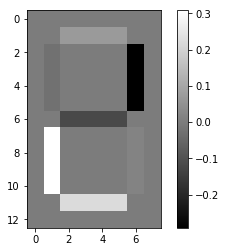

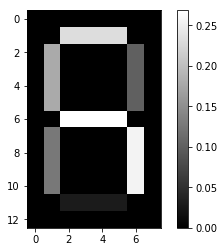

In [23]:
# Import PCA
from sklearn.decomposition import PCA

# Create a PCA instance: model
model = PCA(n_components=7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)
    

In [24]:
# Perform the necessary imports
import pandas as pd
from sklearn.preprocessing import normalize

# Normalize the NMF features: norm_features
norm_features = normalize(nmf_features)

# Create a DataFrame: df
df = pd.DataFrame(norm_features, index=titles)

# Select the row corresponding to 'Cristiano Ronaldo': article
article = df.loc['Cristiano Ronaldo']

# Compute the dot products: similarities
similarities = df.dot(article)

# Display those with the largest cosine similarity
print(similarities.nlargest())

Cristiano Ronaldo                1.000000
Franck Ribéry                    0.999972
Radamel Falcao                   0.999941
Zlatan Ibrahimović               0.999941
France national football team    0.999923
dtype: float64


In [29]:
for i in range(6):
    print(df[df.iloc[:,i] >= 0.9].head(20))

                              0         1         2         3         4  \
Chad Kroeger           1.000000  0.000000  0.000000  0.000000  0.000000   
Nate Ruess             1.000000  0.000000  0.000000  0.000000  0.000000   
The Wanted             0.995147  0.070447  0.009178  0.042540  0.004899   
Stevie Nicks           0.994995  0.005495  0.000000  0.098561  0.000000   
Arctic Monkeys         1.000000  0.000000  0.000000  0.000000  0.000000   
Black Sabbath          1.000000  0.000000  0.000000  0.000000  0.000000   
Skrillex               0.979613  0.015894  0.000000  0.188397  0.000000   
Red Hot Chili Peppers  0.999924  0.000000  0.000000  0.000000  0.012319   
Adam Levine            0.966459  0.036784  0.000000  0.251790  0.034709   

                              5  
Chad Kroeger           0.000000  
Nate Ruess             0.000000  
The Wanted             0.052926  
Stevie Nicks           0.015514  
Arctic Monkeys         0.000000  
Black Sabbath          0.000000  
Skrillex   

In [48]:
# data prep
artists_names = pd.read_csv('artists.csv', header=None)
scrobble = pd.read_csv('scrobbler-small-sample.csv')

# we need to create a sparse array
# users are in rows, and artists in columns
# the values are the total listens for that user of the given artist

In [49]:
scrobble.shape

(2894, 3)

In [50]:
scrobble.head(5)

,user_offset,artist_offset,playcount
0,1,79,58
1,1,84,80
2,1,86,317
3,1,89,64
4,1,96,159


In [35]:
# prepare our compressed sparse row matrix
# artists in rows, users in columns
#from scipy.sparse import csr_matrix
#artists = csr_matrix( (111,500), dtype='float64')

In [52]:
for row, tup in scrobble.iterrows():
    user, artist, count = tup
    print(user, artist, count)
    #csr_matrix[artist, user] = count

1 79 58
1 84 80
1 86 317
1 89 64
1 96 159
1 102 58
1 29 55
1 31 59
1 1 211
2 57 85
2 60 124
2 82 155
2 96 159
2 19 176
2 21 57
2 107 75
2 31 87
2 33 243
2 38 58
2 50 120
2 54 52
2 0 105
2 16 56
3 57 101
3 75 166
3 39 63
4 58 61
4 72 128
4 15 108
5 65 72
5 79 92
5 12 80
6 60 107
6 77 196
6 85 217
6 22 96
6 31 93
7 60 309
7 99 61
7 18 75
8 59 103
8 62 162
8 73 575
8 25 177
9 55 107
9 61 160
9 69 60
9 103 125
9 44 313
9 47 127
9 12 79
10 70 127
10 87 136
10 23 75
10 27 57
10 37 171
10 45 103
10 49 144
10 15 202
11 99 56
11 31 330
11 16 59
12 56 433
12 57 58
12 59 63
12 69 54
12 78 59
12 23 116
12 35 124
12 52 95
12 12 207
12 16 5759
13 104 161
13 20 74
13 106 104
13 23 152
14 75 73
14 104 98
14 106 73
14 107 66
14 26 59
14 33 54
14 35 181
14 50 169
15 56 166
15 58 88
15 63 118
15 70 83
15 82 146
15 2 437
15 109 59
15 29 211
15 33 55
15 40 133
15 43 131
15 46 76
15 0 165
16 72 99
16 82 52
16 23 52
17 82 57
17 89 127
17 96 92
18 55 2786
18 56 168
18 61 1889
18 62 162
18 64 1951
18 66 123
18

151 32 111
151 5 88
152 70 59
152 104 57
152 22 86
152 26 74
152 0 83
152 9 114
152 11 109
152 1 71
153 73 94
153 104 117
153 19 112
153 24 174
153 0 65
154 80 136
154 107 134
154 37 86
154 15 51
154 16 68
155 107 77
155 37 57
155 46 81
156 57 493
156 63 115
156 71 53
156 92 70
156 104 95
156 17 349
156 19 166
156 21 73
156 22 200
156 23 90
156 28 1046
156 3 676
156 29 94
156 40 79
156 41 143
156 42 115
156 48 92
156 8 93
156 14 77
157 56 191
157 58 237
157 71 153
157 72 102
157 75 396
157 20 205
157 106 98
157 35 192
157 39 292
158 86 58
158 23 207
158 33 78
159 57 190
159 63 85
159 91 115
159 97 57
159 104 124
159 21 130
159 106 315
159 109 202
159 23 123
159 26 76
159 31 78
159 39 74
159 48 60
159 14 58
159 16 58
160 61 297
160 66 252
160 78 180
160 103 73
160 21 88
160 47 163
160 52 118
160 12 259
161 73 58
161 43 63
161 16 137
162 18 61
162 23 92
162 8 54
162 0 54
162 14 91
163 60 270
163 88 68
163 92 70
163 107 368
164 59 73
164 74 224
164 92 623
164 103 61
164 104 123
164 109 67

287 14 209
288 71 70
288 94 83
288 23 64
288 47 72
289 57 100
289 62 144
289 65 646
289 82 123
289 106 195
289 24 58
289 44 66
289 47 71
289 16 66
290 103 60
290 47 203
290 12 70
291 60 327
291 82 128
291 92 129
291 99 195
291 107 87
291 24 68
291 9 69
291 110 104
292 60 59
292 79 52
292 82 200
292 108 99
292 32 77
292 35 60
292 47 224
293 66 137
293 72 1884
293 91 349
293 103 598
293 106 68
293 109 437
293 35 161
293 47 302
293 54 126
293 12 990
293 16 228
294 57 129
294 60 166
294 68 72
294 86 64
294 19 62
294 32 134
294 42 187
294 8 101
295 70 92
295 83 102
295 52 620
295 0 77
296 65 54
296 104 78
296 17 53
296 107 125
296 109 257
296 53 330
296 10 121
296 13 81
297 60 109
297 82 67
297 99 65
297 106 60
297 109 56
298 61 53
298 92 55
298 108 86
299 57 162
299 106 91
299 107 153
299 23 192
299 31 261
299 41 121
299 8 89
300 66 68
300 83 76
300 108 62
300 35 207
300 52 81
300 12 118
300 15 115
301 58 79
301 88 180
301 92 94
302 57 249
302 58 100
302 60 92
302 61 86
302 66 93
302 69 13

445 32 89
446 76 54
446 98 106
446 1 148
446 16 204
447 70 122
447 92 51
447 33 96
448 57 468
448 58 174
448 84 53
448 2 87
448 26 54
448 1 166
448 16 77
449 82 971
449 89 139
449 99 62
449 106 81
450 59 311
450 109 271
450 41 85
451 102 236
451 42 375
451 47 267
452 57 102
452 68 52
452 3 107
452 8 58
453 63 99
453 68 2101
453 8 110
454 47 82
454 14 148
454 16 96
455 75 272
455 82 102
455 98 72
455 99 305
455 32 93
456 57 128
456 95 198
456 99 135
456 31 65
456 35 79
456 15 104
457 58 107
457 103 61
457 16 55
458 55 215
458 75 52
458 47 56
459 81 168
459 92 235
459 98 94
459 99 54
459 106 77
459 51 91
459 53 97
459 9 459
459 13 1325
460 82 103
460 107 67
460 110 66
461 57 202
461 65 101
461 3 59
461 16 89
462 60 259
462 89 161
462 90 220
462 92 57
462 34 79
462 37 103
463 80 57
463 99 97
463 110 105
463 15 69
463 16 100
464 60 91
464 6 144
464 14 236
465 82 65
465 99 88
465 110 128
466 57 98
466 32 97
466 14 64
467 95 163
467 109 107
467 11 74
468 92 106
468 103 66
468 110 69
469 62 1

In [46]:
# Perform the necessary imports
from sklearn.decomposition import NMF
from sklearn.preprocessing import Normalizer, MaxAbsScaler
from sklearn.pipeline import make_pipeline

# Create a MaxAbsScaler: scaler
scaler = MaxAbsScaler()

# Create an NMF model: nmf
nmf = NMF(n_components=20)

# Create a Normalizer: normalizer
normalizer = Normalizer()

# Create a pipeline: pipeline
pipeline = make_pipeline(scaler, nmf, normalizer)

# Apply fit_transform to artists: norm_features
norm_features = pipeline.fit_transform(artists)

In [47]:
# Import pandas
import pandas as pd

# Create a DataFrame: df
df = pd.DataFrame(norm_features, index=artist_names)

# Select row of 'Bruce Springsteen': artist
artist = df.loc['Bruce Springsteen']

# Compute cosine similarities: similarities
similarities = df.dot(artist)

# Display those with highest cosine similarity
similarities.nlargest()


NameError: name 'artist_names' is not defined